<a href="https://colab.research.google.com/github/devxkrxshna/GAN/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter




In [33]:
class Discriminator(nn.Module):
  def __init__(self,img_dim):
    super().__init__()
    self.disc= nn.Sequential(
        nn.Linear(img_dim,128),
        nn.LeakyReLU(0.1),
        nn.Linear(128,1),
        nn.Sigmoid(),
    )

  def forward(self,x):
      return self.disc(x)






In [34]:
from torch.nn.modules.activation import LeakyReLU
class Generator(nn.Module):
  def __init__(self,z_dim,img_dim):
    super().__init__()
    self.gen = nn.Sequential(
        nn.Linear(z_dim,256),
        nn.LeakyReLU(0.1),
        nn.Linear(256,img_dim),
        nn.Tanh(), #generate pixel value in the range of (-1,1)


    )

  def forward(self,x):
      return self.gen(x)


In [35]:
lr = 3e-4
z_dim= 64
image_dim = 28*28*1
batch_size = 32
num_epochs= 50

In [36]:
disc = Discriminator(image_dim)
gen = Generator(z_dim, image_dim)

In [37]:
fixed_noise= torch.randn(batch_size,z_dim)
transforms = transforms.Compose(
    [transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))]
)

In [24]:
dataset = datasets.MNIST(root ="dataset/", transform=transforms, download =True)
loader = DataLoader(dataset,batch_size=batch_size, shuffle = True)

In [25]:
opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(),lr=lr)
criterion = nn.BCELoss()


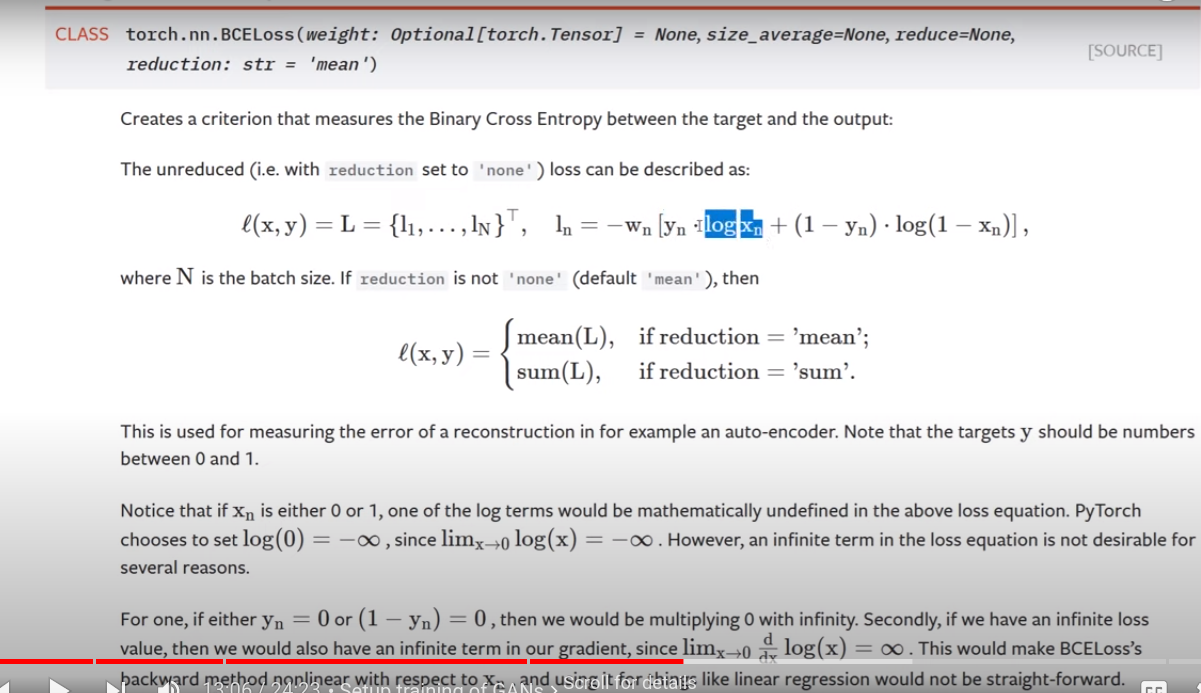

In [38]:
writer_fake = SummaryWriter(f"runs/GAN_MNIT/fake")
writer_real = SummaryWriter(f"runs/GAN_MNIST/real")
step =0


In [39]:
from torchvision.datasets.mnist import read_label_file
for epoch in range(num_epochs):
  for batch_idx, (real,label) in enumerate(loader): #real = image 
    real =real.view(-1,784)
    batch_size = real.shape[0]

    ## Train the Discriminator : max log(D(real)) + log(1-D(G(Z)))

    noise = torch.randn(batch_size , z_dim)
    fake = gen(noise)

    disc_real =disc(real).view(-1)
    lossD_real = criterion(disc_real, torch.ones_like(disc_real))
    
    disc_fake = disc(fake).view(-1)
    lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))

    lossD= (lossD_real+lossD_fake)/2
    disc.zero_grad()
    lossD.backward(retain_graph= True) #to reutillize the fake
    opt_disc.step()



    #Train Generator min log(1-D(G(Z))) is same as max log(D(G(Z)))
    output = disc(fake).view(-1)
    lossG = criterion(output, torch.ones_like(output))
    gen.zero_grad()
    lossG.backward()
    opt_gen.step()

    if batch_idx==0:
      print(
          f"Epoch[{epoch}/{num_epochs}] \ "
          f"LossD: {lossD: .4f}, LosG: {lossG: .4f}"
      )
      with torch.no_grad():
        fake =gen(fixed_noise).reshape(-1,1,28,28)
        data = real.reshape(-1,1,28,28)
        img_grid_fake = torchvision.utils.make_grid(fake, normalize= True)
        img_grid_real = torchvision.utils.make_grid(data, normalize= True)

        writer_fake.add_image(
            "Mnist Fake Images",img_grid_fake,global_step = step
        )
        writer_real.add_image(
            "Mnist Fake Images",img_grid_real,global_step = step
        )

        step+=1








Epoch[0/50] \ LossD:  0.7125, LosG:  0.6632
Epoch[1/50] \ LossD:  0.7278, LosG:  0.6549
Epoch[2/50] \ LossD:  0.7210, LosG:  0.6613
Epoch[3/50] \ LossD:  0.7143, LosG:  0.6688
Epoch[4/50] \ LossD:  0.7096, LosG:  0.6588
Epoch[5/50] \ LossD:  0.7231, LosG:  0.6657
Epoch[6/50] \ LossD:  0.7166, LosG:  0.6540
Epoch[7/50] \ LossD:  0.7156, LosG:  0.6635
Epoch[8/50] \ LossD:  0.7174, LosG:  0.6659
Epoch[9/50] \ LossD:  0.7211, LosG:  0.6621
Epoch[10/50] \ LossD:  0.7226, LosG:  0.6624
Epoch[11/50] \ LossD:  0.7196, LosG:  0.6658
Epoch[12/50] \ LossD:  0.7247, LosG:  0.6627
Epoch[13/50] \ LossD:  0.7173, LosG:  0.6617
Epoch[14/50] \ LossD:  0.7291, LosG:  0.6517
Epoch[15/50] \ LossD:  0.7202, LosG:  0.6612
Epoch[16/50] \ LossD:  0.7087, LosG:  0.6594
Epoch[17/50] \ LossD:  0.7168, LosG:  0.6562
Epoch[18/50] \ LossD:  0.7131, LosG:  0.6625
Epoch[19/50] \ LossD:  0.7244, LosG:  0.6666
Epoch[20/50] \ LossD:  0.7241, LosG:  0.6598
Epoch[21/50] \ LossD:  0.7273, LosG:  0.6608
Epoch[22/50] \ LossD